In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 读入数据
risk_train = pd.read_excel('data_info.xlsx',sheetname='risk_train')
risk_test = pd.read_excel('data_info.xlsx',sheetname='risk_test')

df_data = pd.concat((risk_train,risk_test),axis=0,ignore_index=True,sort=False)


In [2]:
# # 数据属性
print(df_data.info())
print("共有数据集：", df_data.shape[0])
print("共有测试集：", risk_train.shape[0])
print("共有训练集：", risk_test.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 33 columns):
loanID                              15000 non-null int64
uuid                                15000 non-null object
applied_at                          15000 non-null datetime64[ns]
applied_from                        15000 non-null object
applied_type                        15000 non-null object
app1254                             343 non-null float64
overdueDaysGe5PrincipleRatio        9593 non-null float64
overdueDaysAndDeadlineTrend         15000 non-null float64
cell_allFlow                        8626 non-null float64
cell_callno                         13492 non-null float64
cell_micall123                      15000 non-null int64
cell_meanMonCallno                  13492 non-null float64
cell_micallR16                      13488 non-null float64
phoneQGGrantOrgs                    13483 non-null float64
cell_miflowR25                      8318 non-null float64
cellDate   

In [6]:
# 数据统计
df_data.drop('loanID',axis=1).describe()

,app1254,overdueDaysGe5PrincipleRatio,overdueDaysAndDeadlineTrend,cell_allFlow,cell_callno,cell_micall123,cell_meanMonCallno,cell_micallR16,phoneQGGrantOrgs,cell_miflowR25,...,tel_maxCPay,active0476,telRemain,app0329,cell_relateCellRatio,contactsInBlack_blackOrgNum,contactsInWhite_whiteQunarRct,last_loan_day,app0973,y_bad
count,343.000000,9593.000000,15000.000000,8.626000e+03,13492.000000,15000.0,13492.000000,13488.000000,13483.000000,8.318000e+03,...,13427.000000,525.000000,13493.000000,35.0,13492.000000,13492.00000,13483.000000,15000.000000,1162.000000,10000.000000
mean,4.965015,0.000652,-36046.307468,4.189163e+08,1695.922473,0.0,298.360146,0.014342,0.084625,4.276989e-02,...,275.402443,468.144762,75.491000,1.0,0.588820,1.17855,0.007417,-35878.735933,1.688468,0.049000
std,18.108153,0.009221,48014.705932,8.251189e+09,1497.901642,0.0,264.208159,0.027154,0.331822,6.078176e-02,...,1982.413432,7252.977669,1781.292534,0.0,0.181989,1.95678,0.086664,48140.603976,3.333750,0.215879
min,1.000000,0.000000,-99999.000000,-4.438000e+02,1.000000,0.0,0.000000,0.000000,0.000000,-6.000000e-07,...,1.540000,1.000000,-56826.941410,1.0,0.000000,0.00000,0.000000,-99999.000000,1.000000,0.000000
25%,1.000000,0.000000,-99999.000000,4.805967e+06,671.000000,0.0,118.000000,0.002027,0.000000,7.425825e-03,...,144.709999,1.000000,15.080000,1.0,0.474779,0.00000,0.000000,-99999.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,2.313034e+07,1287.000000,0.0,226.816667,0.006159,0.000000,2.366400e-02,...,208.259995,3.000000,37.509998,1.0,0.605911,1.00000,0.000000,171.500000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,6.881439e+07,2242.000000,0.0,395.000000,0.015563,0.000000,5.430950e-02,...,299.809998,9.000000,86.550003,1.0,0.724333,2.00000,0.000000,271.000000,1.000000,0.000000
max,160.000000,0.333314,1.000000,3.914870e+11,16183.000000,0.0,3060.400000,0.753394,5.000000,9.715341e-01,...,222980.437500,117623.000000,197918.812500,1.0,1.000000,61.00000,2.000000,979.000000,53.000000,1.000000


In [7]:
# 观察训练、测试集数据同分布情况
print(df_data[df_data['y_bad'].isnull()].describe())

             loanID     app1254  overdueDaysGe5PrincipleRatio  \
count   5000.000000  121.000000                   3284.000000   
mean   12499.500000    5.471074                      0.000669   
std     1443.520003   20.308896                      0.008396   
min    10000.000000    1.000000                      0.000000   
25%    11249.750000    1.000000                      0.000000   
50%    12499.500000    1.000000                      0.000000   
75%    13749.250000    2.000000                      0.000000   
max    14999.000000  160.000000                      0.167250   

       overdueDaysAndDeadlineTrend  cell_allFlow   cell_callno  \
count                  5000.000000  2.946000e+03   4838.000000   
mean                 -34319.659562  4.506596e+08   1728.533278   
std                   47482.030670  1.062456e+10   1539.716333   
min                  -99999.000000 -3.330000e+02      1.000000   
25%                  -99999.000000  4.345702e+06    683.250000   
50%               

In [8]:
print(df_data[df_data['y_bad'].notnull()].describe())

            loanID     app1254  overdueDaysGe5PrincipleRatio  \
count  10000.00000  222.000000                   6309.000000   
mean    4999.50000    4.689189                      0.000644   
std     2886.89568   16.830477                      0.009623   
min        0.00000    1.000000                      0.000000   
25%     2499.75000    1.000000                      0.000000   
50%     4999.50000    1.000000                      0.000000   
75%     7499.25000    2.000000                      0.000000   
max     9999.00000  160.000000                      0.333314   

       overdueDaysAndDeadlineTrend  cell_allFlow   cell_callno  \
count                 10000.000000  5.680000e+03   8654.000000   
mean                 -36909.631421  4.024523e+08   1677.691472   
std                   48258.037388  6.697869e+09   1473.784070   
min                  -99999.000000 -4.438000e+02      1.000000   
25%                  -99999.000000  5.107166e+06    662.000000   
50%                       0

In [9]:
df_data.dtypes

loanID                                       int64
uuid                                        object
applied_at                          datetime64[ns]
applied_from                                object
applied_type                                object
app1254                                    float64
overdueDaysGe5PrincipleRatio               float64
overdueDaysAndDeadlineTrend                float64
cell_allFlow                               float64
cell_callno                                float64
cell_micall123                               int64
cell_meanMonCallno                         float64
cell_micallR16                             float64
phoneQGGrantOrgs                           float64
cell_miflowR25                             float64
cellDate                                   float64
app1176                                    float64
contactsXyqbRegisteredUserNumRct           float64
delq_days_max                              float64
fst_apply_day                  

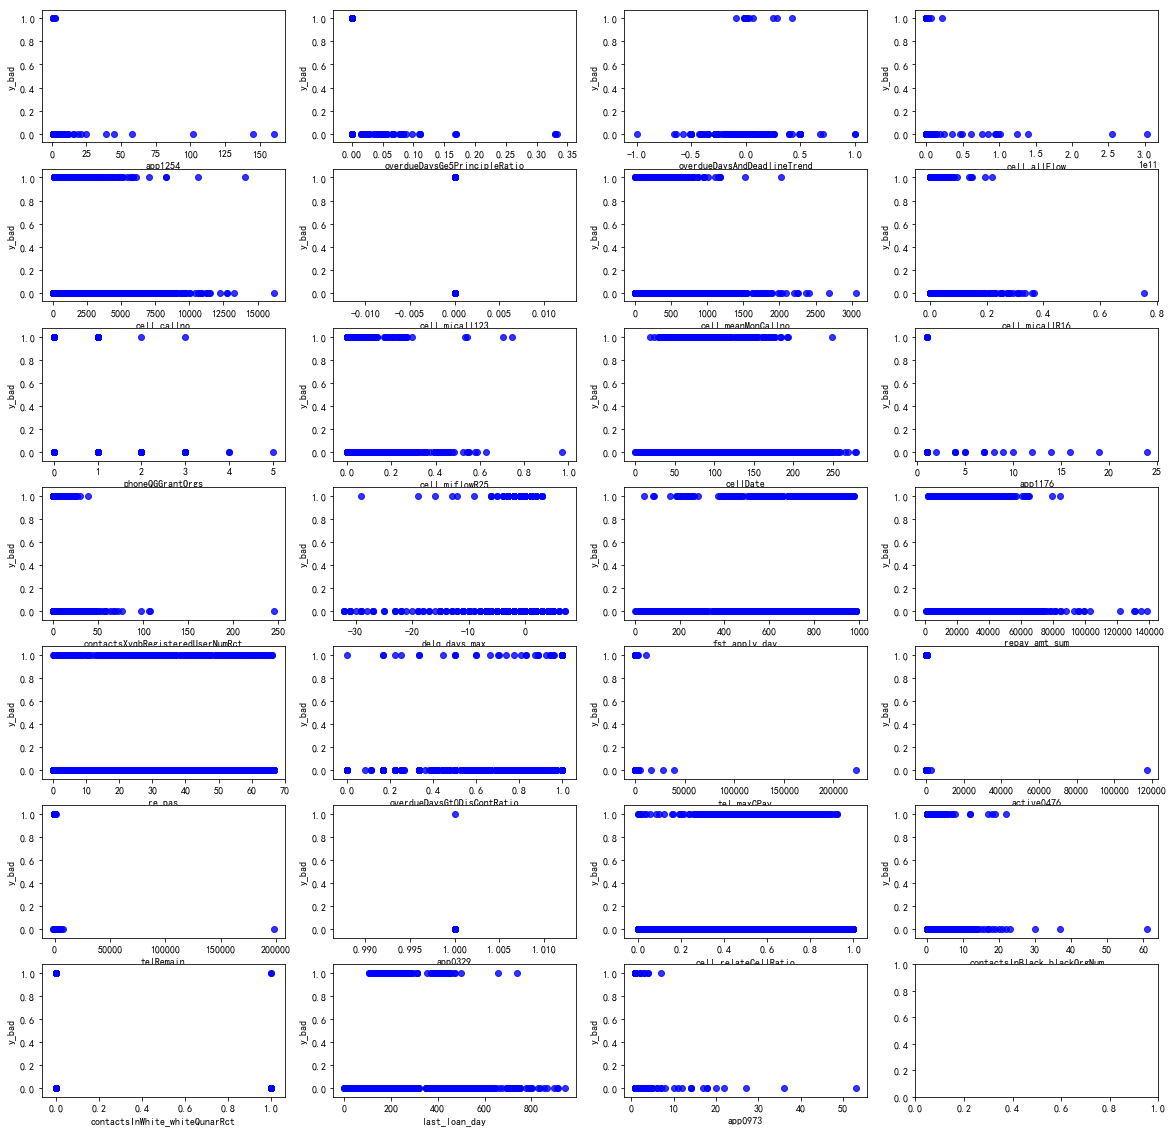

In [43]:
# 拖尾特征分析
name_list = ['app1254','overdueDaysGe5PrincipleRatio','overdueDaysAndDeadlineTrend','cell_allFlow',
            'cell_callno','cell_micall123','cell_meanMonCallno','cell_micallR16','phoneQGGrantOrgs',
            'cell_miflowR25','cellDate','app1176','contactsXyqbRegisteredUserNumRct','delq_days_max',
            'fst_apply_day','repay_amt_sum','re_pas','overdueDaysGt0DisContRatio','tel_maxCPay','active0476',
            'telRemain','app0329','cell_relateCellRatio','contactsInBlack_blackOrgNum','contactsInWhite_whiteQunarRct',
            'last_loan_day','app0973']

f,ax = plt.subplots(7,4,figsize=(20,20))

for i,name in enumerate(name_list):
    sns_plot = sns.regplot(data=df_data,x=name,y='y_bad',color='b',ax = ax[i//4][i%4],fit_reg=False)
plt.show()
fig = sns_plot.get_figure()
fig.savefig('./各数值型变量的分布情况.jpg')

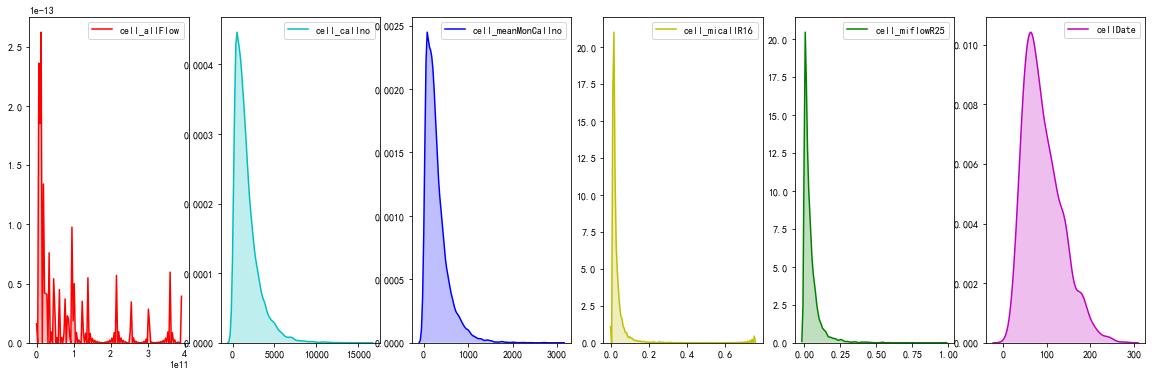

In [36]:
f, ax = plt.subplots(1, 6, figsize=(20, 6))

sns_plot = sns.kdeplot(data=df_data['cell_allFlow'], color='r', shade=True, ax=ax[0])
sns_plot = sns.kdeplot(data=df_data['cell_callno'], color='c', shade=True, ax=ax[1])
sns_plot = sns.kdeplot(data=df_data['cell_meanMonCallno'], color='b', shade=True, ax=ax[2])
sns_plot = sns.kdeplot(data=df_data['cell_micallR16'], color='y', shade=True, ax=ax[3])
sns_plot = sns.kdeplot(data=df_data['cell_miflowR25'], color='g', shade=True, ax=ax[4])
sns_plot = sns.kdeplot(data=df_data['cellDate'], color='m', shade=True, ax=ax[5])
plt.show()

fig = sns_plot.get_figure()
fig.savefig('./手机使用情况相关分布图.jpg')

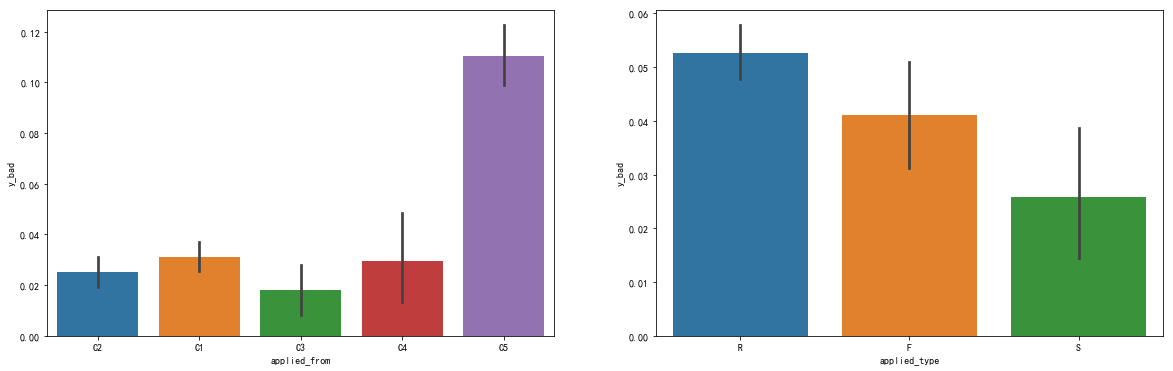

In [40]:
# 离散特征分析
f, ax = plt.subplots(1, 2, figsize=(20, 6))

sns_plot = sns.barplot(data=df_data, x='applied_from', y='y_bad', ax=ax[0])
sns_plot = sns.barplot(data=df_data, x='applied_type', y='y_bad', ax=ax[1])
plt.show()
fig = sns_plot.get_figure()
fig.savefig('./离散特征分析图.jpg')

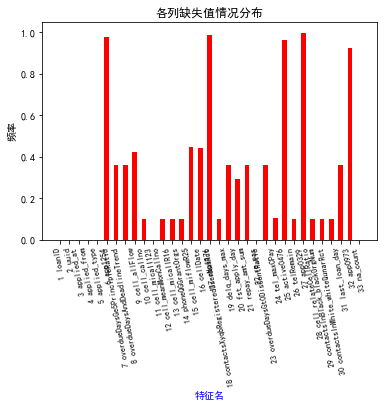

In [42]:
# 缺失值的统计分析
df_data.replace(-99999,np.nan,inplace=True)
df_data['na_count'] = df_data.shape[1] - df_data.drop('y_bad',axis=1).count(axis=1)-1
y = [i/df_data.shape[0] for i in np.array(df_data.drop('y_bad',axis=1).isnull().sum())]
x = [i for i in range(len(df_data.drop('y_bad',axis=1).columns))]
plt.bar(x,y,width=0.5,color='r')
_xticks_labels = [str(index + 1) + " " + value for index, value in enumerate(np.array(df_data.drop('y_bad',axis=1).columns))]
plt.xticks(x, _xticks_labels, rotation=100, fontsize=8)
plt.title("各列缺失值情况分布")
plt.xlabel("特征名", color='b')
plt.ylabel("频率", color='black')
plt.savefig('./特征缺失值分布图.jpg')
plt.show()

In [ ]:
# 对训练集的label进行统计分析
values = risk_train['y_bad'].values
plt.hist(values)
plt.xlabel('y_bad')
plt.ylabel('Frequency')
plt.title('Frequency of y_bad')
plt.show()
plt.savefig('./训练集label的分布.jpg')

In [ ]:
# 各变量与目标标量的相关性
risk_train.replace(-99999,np.nan,inplace=True)
risk_train.drop(['loanID',])
corr_df = pd.DataFrame(risk_train.corr()['y_bad'].sort_values())
# print(corr_df)
print('正相关性变量：',corr_df[corr_df.y_bad>0].index)
print('负相关性变量：',corr_df[corr_df.y_bad<0].index)

In [ ]:
y = risk_train.corr()
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(y,square=True,annot=True)
plt.show()
fig = sns_plot.get_figure()
fig.savefig('./各变量与目标变量相关系数热力图1.jpg')